In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical

In [19]:
# 패션MNIST 데이터셋 로딩
data = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = data.load_data()

In [20]:
X_train.shape

(60000, 28, 28)

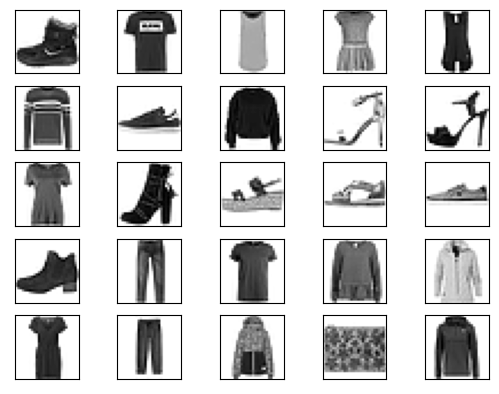

In [3]:
class_names = ['T-shirt', "Trouser", "Pullover","Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

for i in range(25):
    plt.subplot(5,5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap=plt.cm.binary)
plt.show()

## CNN을 사용하지 않고 분류해 보기

In [4]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [11]:
X_train.shape

(60000, 28, 28)

In [5]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20)
model.evaluate(X_test, y_test, verbose=2)

Epoch 1/20
1875/1875 [==============================] - 9s 4ms/step - loss: 0.5285 - accuracy: 0.8144
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3983 - accuracy: 0.8568
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3659 - accuracy: 0.8659
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3455 - accuracy: 0.8729
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3305 - accuracy: 0.8801
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3176 - accuracy: 0.8827
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3085 - accuracy: 0.8861
Epoch 8/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2982 - accuracy: 0.8888
Epoch 9/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2916 - accuracy: 0.8917
Epoch 10/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2

[0.3386478126049042, 0.8865000009536743]

(60000, 28, 28, 1)

# CNN으로 Fashion MNIST 분석하기

In [18]:
X_train.reshape(-1, 28, 28, 1).shape

(60000, 28, 28, 1)

In [23]:
X_train_final = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test_final = X_test.reshape(-1, 28, 28, 1) / 255.0

In [25]:
model_with_conv = Sequential()
model_with_conv.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model_with_conv.add(MaxPooling2D((2,2), strides=2))
model_with_conv.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model_with_conv.add(MaxPooling2D((2,2), strides=2))
model_with_conv.add(Flatten())
model_with_conv.add(Dense(128, activation='relu'))
model_with_conv.add(Dense(10, activation='softmax'))
model_with_conv.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [26]:
model_with_conv.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [28]:
model_with_conv.fit(X_train_final, y_train, epochs=10)
model_with_conv.evaluate(X_test_final, y_test, verbose=2)

Epoch 1/10
1875/1875 [==============================] - 28s 12ms/step - loss: 0.3942 - accuracy: 0.8590
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2582 - accuracy: 0.9057
Epoch 3/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.2132 - accuracy: 0.9214
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1814 - accuracy: 0.9315
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1561 - accuracy: 0.9410
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1323 - accuracy: 0.9507
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1105 - accuracy: 0.9581
Epoch 8/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0922 - accuracy: 0.9660
Epoch 9/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0752 - accuracy: 0.9724
Epoch 10/10
1875/1875 [==============================] - 20s 11m

[0.3150719404220581, 0.9200000166893005]

# 전이학습
* 대량의 데이터셋을 이용해서 사전에 학습하고 만들어진 모델의 가중치를 가져와 우리가 원하는 분석에 활용하는 것
* 사전 훈련된 모델을 가져와서 커스터마이징 하는 것을 Fine-tuning이라고 한다.
* 1) 특성 추출법: 사전 훈련된 모델을 가져온 후 마지막 완전연결층 부분만 새로 만듬
  * 합성곱층: 합성곱층과 풀링층으로 구성
  * 완전연결층: 데이터분류기, 추출된 특성을 입력받아 최종적으로 이미지 분류 수행
  * Xception
  * Inception V3
  * ResNet50
  * VGG16
  * VGG19
  * MobileNet

### ResNet50모델을 사용해서 개와 고양이 분류하기

In [29]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalMaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.image as mpimg

In [30]:
base_model = ResNet50(include_top=True, weights='imagenet', input_tensor=None, input_shape=None,
                     pooling=None, classes=1000)

102967424/102967424 [==============================] - 37s 0us/step


In [31]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [33]:
# 우리 모델 추가하기
model.trainable=False
model = Sequential()
model.add(base_model)
model.add(Dense(2, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1000)              25636712  
                                                                 
 dense_5 (Dense)             (None, 2)                 2002      
                                                                 
Total params: 25,638,714
Trainable params: 2,002
Non-trainable params: 25,636,712
_________________________________________________________________


In [35]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
modelpath = "./model/{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

In [36]:
batch_size = 32
image_height=224
image_width=224
train_dir = "./data/catanddog/train/"
test_dir = "./data/catanddog/validation/"

In [41]:
# 다양한 이미지 샘플을 만들기위한 이미지 변형 작업
train = ImageDataGenerator(
        rescale=1./255.0,
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1
)

train_generator = train.flow_from_directory(train_dir,
                                           target_size=(image_height, image_width),
                                           color_mode='rgb',
                                           batch_size=batch_size,
                                           seed=1,
                                           shuffle=True,
                                           class_mode='categorical')

valid = ImageDataGenerator(rescale=1./255.0)
valid_generator = valid.flow_from_directory(test_dir,
                                            target_size=(image_height, image_width),
                                           color_mode='rgb',
                                           batch_size=batch_size,
                                           seed=1,
                                           shuffle=True,
                                           class_mode='categorical')


Found 385 images belonging to 2 classes.
Found 98 images belonging to 2 classes.


In [42]:
history = model.fit(train_generator, epochs=2000, validation_data=valid_generator, verbose=2,
                   callbacks=[early_stopping_callback, checkpointer])

Epoch 1/2000

Epoch 1: val_loss improved from inf to 0.69315, saving model to ./model\01-0.5000.hdf5
13/13 - 38s - loss: 0.6930 - accuracy: 0.5273 - val_loss: 0.6932 - val_accuracy: 0.5000 - 38s/epoch - 3s/step
Epoch 2/2000

Epoch 2: val_loss did not improve from 0.69315
13/13 - 23s - loss: 0.6930 - accuracy: 0.5273 - val_loss: 0.6932 - val_accuracy: 0.5000 - 23s/epoch - 2s/step
Epoch 3/2000

Epoch 3: val_loss did not improve from 0.69315
13/13 - 22s - loss: 0.6928 - accuracy: 0.5273 - val_loss: 0.6932 - val_accuracy: 0.5000 - 22s/epoch - 2s/step
Epoch 4/2000

Epoch 4: val_loss did not improve from 0.69315
13/13 - 23s - loss: 0.6926 - accuracy: 0.5273 - val_loss: 0.6932 - val_accuracy: 0.5000 - 23s/epoch - 2s/step
Epoch 5/2000

Epoch 5: val_loss did not improve from 0.69315
13/13 - 22s - loss: 0.6926 - accuracy: 0.5273 - val_loss: 0.6932 - val_accuracy: 0.5000 - 22s/epoch - 2s/step
Epoch 6/2000

Epoch 6: val_loss did not improve from 0.69315
13/13 - 23s - loss: 0.6926 - accuracy: 0.527

13/13 - 23s - loss: 0.6917 - accuracy: 0.5273 - val_loss: 0.6936 - val_accuracy: 0.5000 - 23s/epoch - 2s/step
Epoch 48/2000

Epoch 48: val_loss did not improve from 0.69310
13/13 - 22s - loss: 0.6916 - accuracy: 0.5273 - val_loss: 0.6937 - val_accuracy: 0.5000 - 22s/epoch - 2s/step
Epoch 49/2000

Epoch 49: val_loss did not improve from 0.69310
13/13 - 23s - loss: 0.6917 - accuracy: 0.5273 - val_loss: 0.6939 - val_accuracy: 0.5000 - 23s/epoch - 2s/step
Epoch 50/2000

Epoch 50: val_loss did not improve from 0.69310
13/13 - 22s - loss: 0.6914 - accuracy: 0.5273 - val_loss: 0.6940 - val_accuracy: 0.5000 - 22s/epoch - 2s/step
Epoch 51/2000

Epoch 51: val_loss did not improve from 0.69310
13/13 - 23s - loss: 0.6914 - accuracy: 0.5273 - val_loss: 0.6941 - val_accuracy: 0.5000 - 23s/epoch - 2s/step
Epoch 52/2000

Epoch 52: val_loss did not improve from 0.69310
13/13 - 21s - loss: 0.6915 - accuracy: 0.5273 - val_loss: 0.6940 - val_accuracy: 0.5000 - 21s/epoch - 2s/step
Epoch 53/2000

Epoch 53: 

Epoch 95/2000

Epoch 95: val_loss did not improve from 0.69310
13/13 - 15s - loss: 0.6913 - accuracy: 0.5273 - val_loss: 0.6940 - val_accuracy: 0.5000 - 15s/epoch - 1s/step
Epoch 96/2000

Epoch 96: val_loss did not improve from 0.69310
13/13 - 15s - loss: 0.6912 - accuracy: 0.5273 - val_loss: 0.6941 - val_accuracy: 0.5000 - 15s/epoch - 1s/step
Epoch 97/2000

Epoch 97: val_loss did not improve from 0.69310
13/13 - 14s - loss: 0.6912 - accuracy: 0.5273 - val_loss: 0.6942 - val_accuracy: 0.5000 - 14s/epoch - 1s/step
Epoch 98/2000

Epoch 98: val_loss did not improve from 0.69310
13/13 - 15s - loss: 0.6912 - accuracy: 0.5273 - val_loss: 0.6942 - val_accuracy: 0.5000 - 15s/epoch - 1s/step
Epoch 99/2000

Epoch 99: val_loss did not improve from 0.69310
13/13 - 14s - loss: 0.6912 - accuracy: 0.5273 - val_loss: 0.6943 - val_accuracy: 0.5000 - 14s/epoch - 1s/step
Epoch 100/2000

Epoch 100: val_loss did not improve from 0.69310
13/13 - 15s - loss: 0.6912 - accuracy: 0.5273 - val_loss: 0.6945 - val

In [43]:
import matplotlib as mpl
import koreanize_matplotlib

Text(0.5, 1.0, '오차')

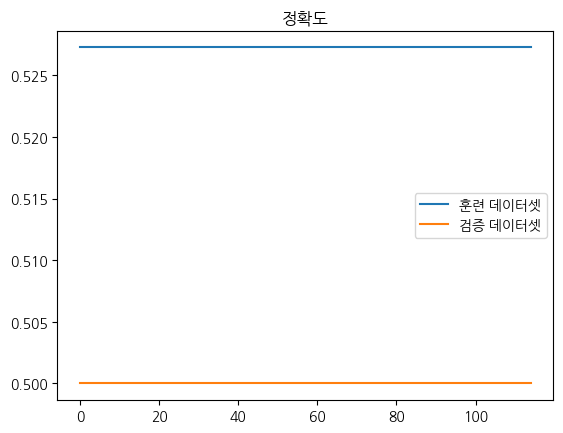

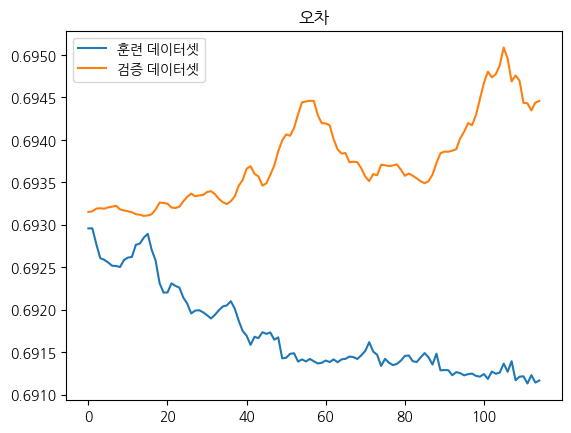

In [44]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, label="훈련 데이터셋")
plt.plot(epochs, val_accuracy, label="검증 데이터셋")
plt.legend()
plt.title('정확도')
plt.figure()

plt.plot(epochs, loss, label="훈련 데이터셋")
plt.plot(epochs, val_loss, label="검증 데이터셋")
plt.legend()
plt.title('오차')


1/1 [==============================] - 0s 39ms/step


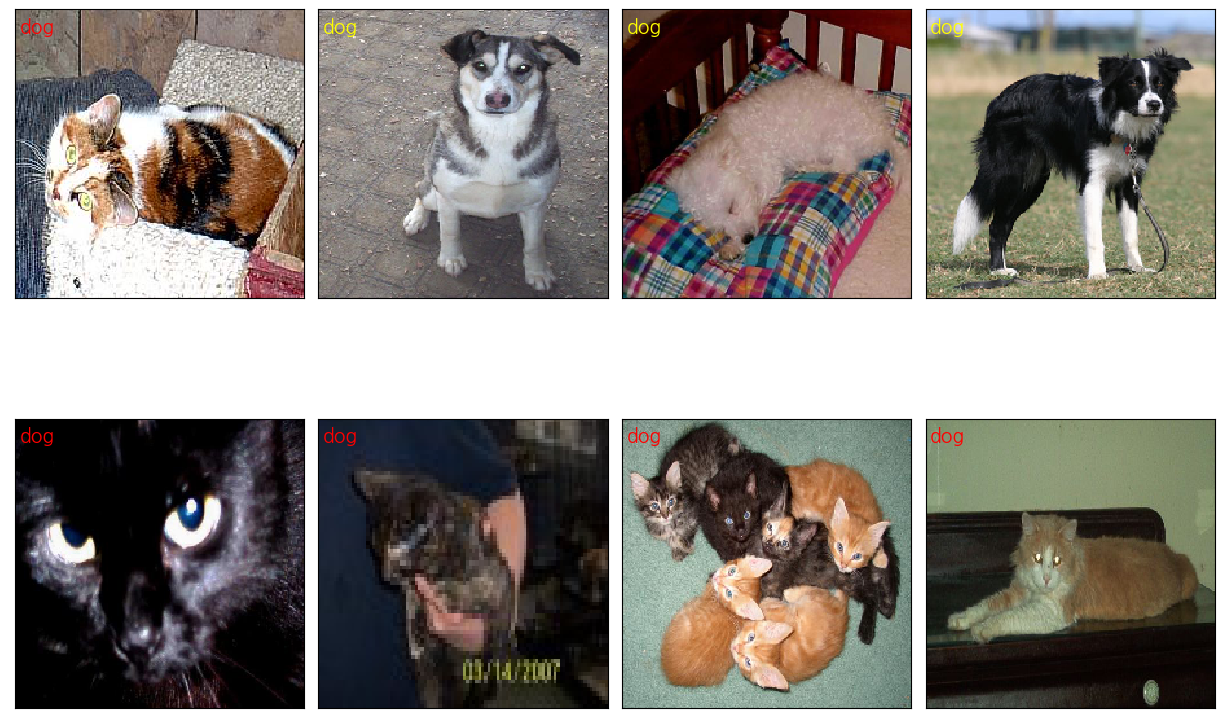

In [46]:
class_names = ['cat','dog']
validation, label_batch = next(iter(valid_generator))
prediction_values = model.predict(validation)
prediction_values = np.argmax(prediction_values, axis=1)

fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(8):
    ax = fig.add_subplot(2,4, i +1, xticks=[], yticks=[])
    ax.imshow(validation[i,:], cmap=plt.cm.gray_r, interpolation='nearest')
    if prediction_values[i] == np.argmax(label_batch[i]):
        ax.text(3, 17, class_names[prediction_values[i]], color='yellow', fontsize=14)
    else:
        ax.text(3, 17, class_names[prediction_values[i]], color='red', fontsize=14)


# 텐서플로 허브에서 모델 가져와 사용하기

In [47]:
import tensorflow_hub as hub
model = tf.keras.Sequential()
model.add(hub.KerasLayer("https://tfhub.dev/google/imagenet/resnet_v2_152/feature_vector/4",
                   input_shape=(224, 224, 3),
                   trainable=False))
model.add(Dense(2, activation='softmax'))

In [48]:
# 다양한 이미지 샘플을 만들기위한 이미지 변형 작업
train = ImageDataGenerator(
        rescale=1./255.0,
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1
)

train_generator = train.flow_from_directory(train_dir,
                                           target_size=(image_height, image_width),
                                           color_mode='rgb',
                                           batch_size=batch_size,
                                           seed=1,
                                           shuffle=True,
                                           class_mode='categorical')

valid = ImageDataGenerator(rescale=1./255.0)
valid_generator = valid.flow_from_directory(test_dir,
                                            target_size=(image_height, image_width),
                                           color_mode='rgb',
                                           batch_size=batch_size,
                                           seed=1,
                                           shuffle=True,
                                           class_mode='categorical')


Found 385 images belonging to 2 classes.
Found 98 images belonging to 2 classes.


In [49]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
modelpath = "./model/{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

In [50]:
history = model.fit(train_generator, epochs=20, validation_data=valid_generator, verbose=2,
                   callbacks=[early_stopping_callback, checkpointer])

Epoch 1/20

Epoch 1: val_loss improved from inf to 0.15557, saving model to ./model\01-0.9796.hdf5
13/13 - 57s - loss: 0.4892 - accuracy: 0.8182 - val_loss: 0.1556 - val_accuracy: 0.9796 - 57s/epoch - 4s/step
Epoch 2/20

Epoch 2: val_loss improved from 0.15557 to 0.07929, saving model to ./model\02-0.9898.hdf5
13/13 - 46s - loss: 0.1331 - accuracy: 0.9818 - val_loss: 0.0793 - val_accuracy: 0.9898 - 46s/epoch - 4s/step
Epoch 3/20

Epoch 3: val_loss improved from 0.07929 to 0.06928, saving model to ./model\03-0.9796.hdf5
13/13 - 45s - loss: 0.0810 - accuracy: 0.9792 - val_loss: 0.0693 - val_accuracy: 0.9796 - 45s/epoch - 3s/step
Epoch 4/20

Epoch 4: val_loss improved from 0.06928 to 0.05250, saving model to ./model\04-0.9898.hdf5
13/13 - 45s - loss: 0.0577 - accuracy: 0.9870 - val_loss: 0.0525 - val_accuracy: 0.9898 - 45s/epoch - 3s/step
Epoch 5/20

Epoch 5: val_loss improved from 0.05250 to 0.04820, saving model to ./model\05-0.9898.hdf5
13/13 - 45s - loss: 0.0441 - accuracy: 0.9922 - v

1/1 [==============================] - 0s 51ms/step


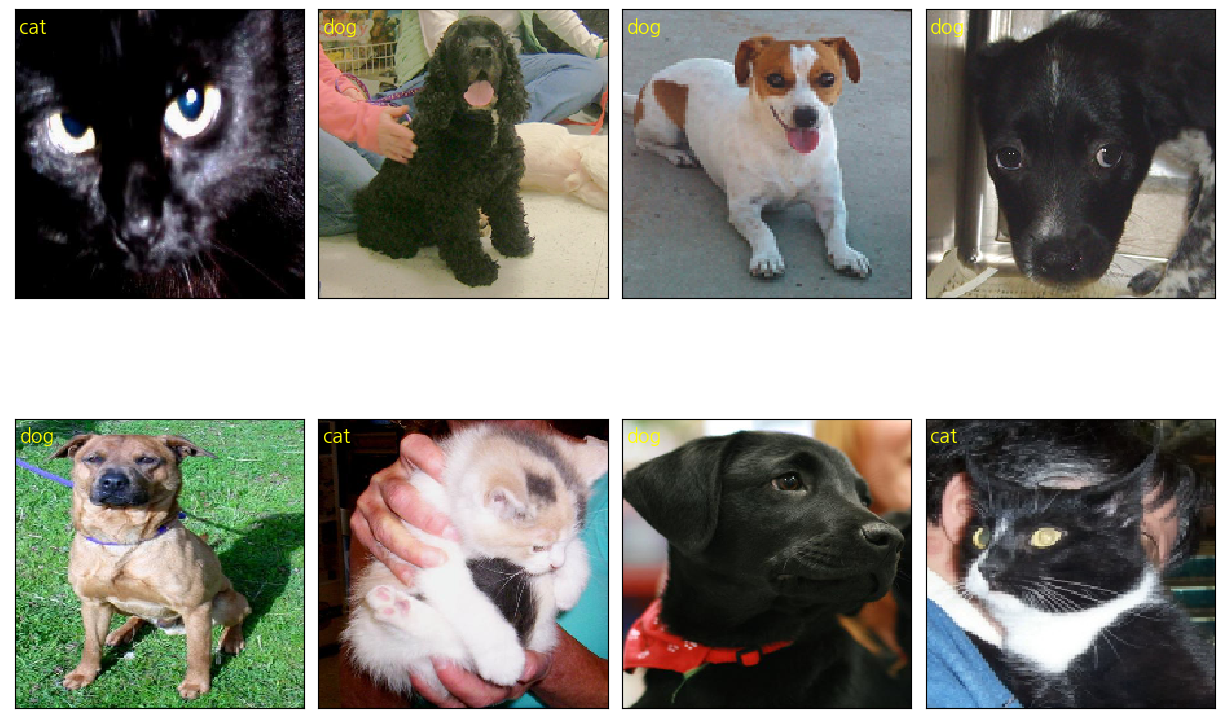

In [52]:
class_names = ['cat','dog']
validation, label_batch = next(iter(valid_generator))
prediction_values = model.predict(validation)
prediction_values = np.argmax(prediction_values, axis=1)

fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(8):
    ax = fig.add_subplot(2,4, i +1, xticks=[], yticks=[])
    ax.imshow(validation[i,:], cmap=plt.cm.gray_r, interpolation='nearest')
    if prediction_values[i] == np.argmax(label_batch[i]):
        ax.text(3, 17, class_names[prediction_values[i]], color='yellow', fontsize=14)
    else:
        ax.text(3, 17, class_names[prediction_values[i]], color='red', fontsize=14)
